In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sb
from IPython.display import Image
from IPython.core.display import HTML
from pylab import rcParams

import sklearn
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets

In [20]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### Singular Value Decomposition (SVD)

In [24]:
# A linear algebra method that decomposes a matrix into three resultant
# matrices to reduce information redundancy and noise.
# Most commonly used for principal component analysis
# A = u x v x S
# A = original matrix
# u = left orthogonal matrix; holds important, nonredundant information about obserbvations
# v = right orthogonal matrix, holds important, nonredundant information on features
# S = diagonal matrix; contains all of the information about the decomposition performed during the compression

### PCA on the wine dataset

In [36]:
wine = datasets.load_wine()
X = wine.data
variable_names = wine.feature_names
X[0:10,]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02],
       [1.420e+01, 1.760e+00, 2.450e+00, 1.520e+01, 1.120e+02, 3.270e+00,
        3.390e+00, 3.400e-01, 1.970e+00, 6.750e+00, 1.050e+00, 2.850e+00,
        1.45

In [32]:
pca = decomposition.PCA()
wine_pca = pca.fit_transform(X)

In [25]:
# Explained Variance Ratio: tells us how much information is 
# compressed into the first few components. When deciding how many 
# components to keep, lookat the percent of cumulative variance. 
# Make sure to retain at least 70% of the dataset's original information
pca.explained_variance_ratio_

array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05,
       1.23636847e-05, 8.46213034e-06, 2.80681456e-06, 1.52308053e-06,
       1.12783044e-06, 7.21415811e-07, 3.78060267e-07, 2.12013755e-07,
       8.25392788e-08])

In [26]:
pca.explained_variance_ratio_.sum()

0.9999999999999999

In [18]:
comps = pd.DataFrame(pca.components_, columns=variable_names)
comps

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.001659,-0.000681,0.000195,-0.004671,0.017868,0.000990,0.001567,-0.000123,0.000601,0.002327,0.000171,0.000705,0.999823
1,0.001203,0.002155,0.004594,0.026450,0.999344,0.000878,-0.000052,-0.001354,0.005004,0.015100,-0.000763,-0.003495,-0.017774
2,-0.016874,-0.122003,-0.051987,-0.938593,0.029780,0.040485,0.085443,-0.013511,0.024659,-0.291398,0.025978,0.070324,-0.004529
3,-0.141447,-0.160390,0.009773,0.330965,0.005394,0.074585,0.169087,-0.010806,0.050121,-0.878894,0.060035,0.178200,0.003113
4,0.020337,-0.612883,0.020176,0.064352,-0.006149,0.315245,0.524761,-0.029648,0.251183,0.331747,0.051524,0.260639,-0.002299
5,0.194120,0.742473,0.041753,-0.024065,-0.001924,0.278717,0.433598,-0.021953,0.241884,0.002740,-0.023776,0.288913,-0.001212
6,-0.923280,0.150110,-0.045010,-0.031527,-0.001797,0.020186,0.038869,0.004665,0.309799,0.112837,-0.030820,-0.101974,0.001076
7,-0.284821,0.064674,0.149340,-0.015154,0.003552,0.177238,0.248117,-0.006498,-0.870433,0.081287,0.002952,0.186715,-0.000010
8,-0.086601,-0.015662,-0.073650,-0.002045,0.001964,-0.255673,-0.378307,-0.036752,0.051520,0.099029,-0.033065,0.873747,0.000073
9,-0.002245,-0.018509,-0.086800,0.003554,-0.000041,0.847195,-0.520138,0.037713,0.009723,-0.023147,-0.038470,0.017017,0.000049


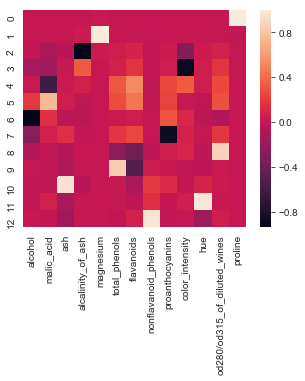

In [27]:
# Correlation heatmap to see how the dataset variables correlate with the 
# principal components
sb.heatmap(comps)